Generating scale-free graph with 1000 nodes...
Condensation's Sources
756
Condensation's Sinks
101
Edges Required
756
Strongly Connected?
True
Graph with 1000 nodes and 2112 edges (total=3112) took 0.5616 seconds
m + n = 857
Generating scale-free graph with 2000 nodes...
Condensation's Sources
1500
Condensation's Sinks
210
Edges Required
1500
Strongly Connected?
True
Graph with 2000 nodes and 4277 edges (total=6277) took 0.2205 seconds
m + n = 1710
Generating scale-free graph with 3000 nodes...
Condensation's Sources
2289
Condensation's Sinks
304
Edges Required
2289
Strongly Connected?
True
Graph with 3000 nodes and 6589 edges (total=9589) took 1.7232 seconds
m + n = 2593
Generating scale-free graph with 4000 nodes...
Condensation's Sources
3035
Condensation's Sinks
440
Edges Required
3035
Strongly Connected?
True
Graph with 4000 nodes and 8714 edges (total=12714) took 0.6285 seconds
m + n = 3475
Generating scale-free graph with 5000 nodes...
Condensation's Sources
3763
Condensation's 

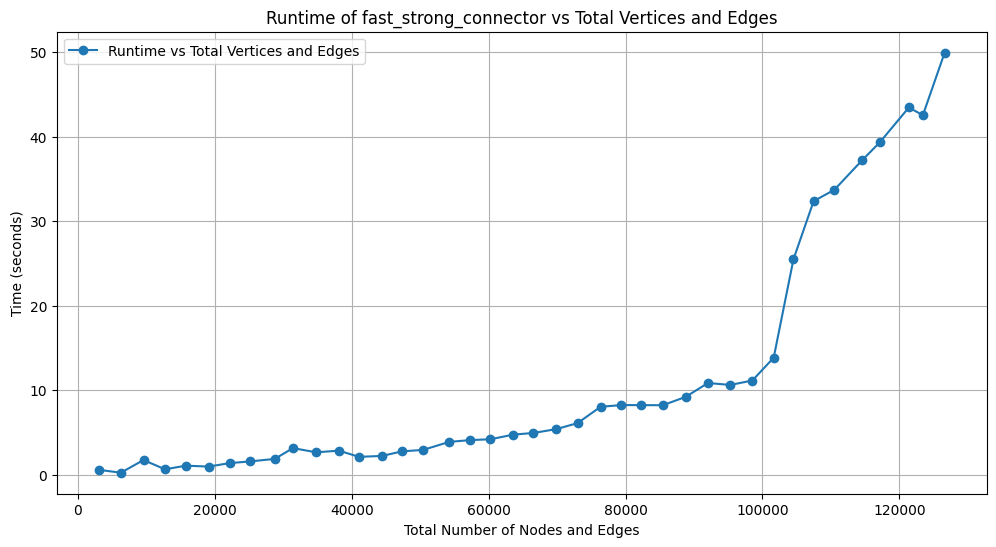

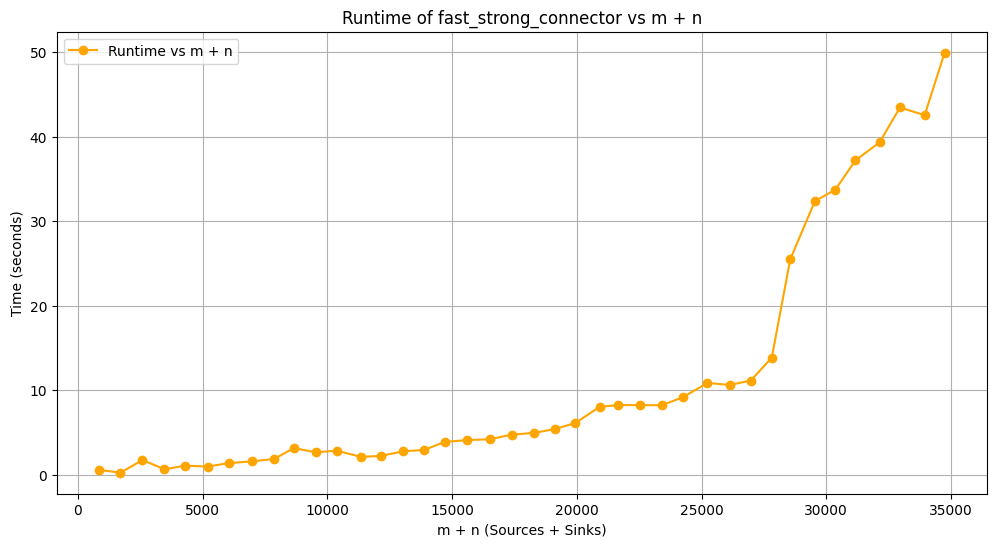

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import timeit

from Connectors_Version_2 import fast_strong_connector  # 确保模块正确导入

# 创建从 1000 到 40000，以 1000 为间隔的图规模
graph_sizes = range(1000, 40001, 1000)
vertices_and_edges = []  # 存储每个图的总节点数和边数之和
times = []  # 存储运行时间
m_plus_n = []  # 存储 m + n 的值

# 测试每个图的 fast_strong_connector 执行时间
for size in graph_sizes:
    print(f"Generating scale-free graph with {size} nodes...")
    graph = nx.scale_free_graph(size)  # 生成 scale-free 图
    total_nodes = len(graph.nodes)  # 图的节点数
    total_edges = len(graph.edges)  # 图的边数
    vertices_and_edges.append(total_nodes + total_edges)  # 总和

    # 测量运行时间并获取 m 和 n
    start_time = timeit.default_timer()
    P, m, n = fast_strong_connector(graph, final_readout=True)
    elapsed_time = timeit.default_timer() - start_time

    times.append(elapsed_time)
    m_plus_n.append(m + n)
    print(f"Graph with {total_nodes} nodes and {total_edges} edges (total={total_nodes + total_edges}) took {elapsed_time:.4f} seconds")
    print(f"m + n = {m + n}")

# 绘制第一个曲线：总节点数和边数之和 vs 运行时间
plt.figure(figsize=(12, 6))
plt.plot(vertices_and_edges, times, marker='o', label='Runtime vs Total Vertices and Edges')
plt.title("Runtime of fast_strong_connector vs Total Vertices and Edges")
plt.xlabel("Total Number of Nodes and Edges")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid(True)
plt.show()

# 绘制第二个曲线：m + n vs 运行时间
plt.figure(figsize=(12, 6))
plt.plot(m_plus_n, times, marker='o', label='Runtime vs m + n', color='orange')
plt.title("Runtime of fast_strong_connector vs m + n")
plt.xlabel("m + n (Sources + Sinks)")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [9]:
vertices_and_edges = np.array(vertices_and_edges).reshape(-1, 1)
m_plus_n = np.array(m_plus_n).reshape(-1, 1)
times = np.array(times)

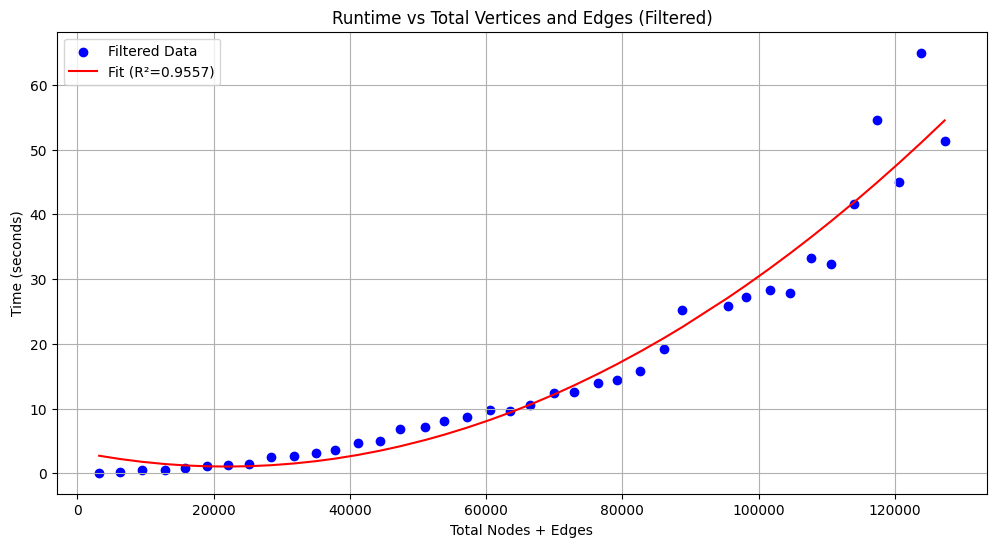

In [18]:
# 使用 z-score 检测异常值
mean_time = np.mean(times)
std_time = np.std(times)
z_scores = (times - mean_time) / std_time

# 定义 z-score 阈值，通常使用 3 或 2
threshold = 3
filtered_indices = np.abs(z_scores) < threshold

# 过滤后的数据
filtered_vertices_and_edges = vertices_and_edges[filtered_indices]
filtered_times = times[filtered_indices]

# 多项式拟合
poly_features = PolynomialFeatures(degree=2)  # 二次多项式
X_poly_filtered = poly_features.fit_transform(filtered_vertices_and_edges)
model_filtered = LinearRegression().fit(X_poly_filtered, filtered_times)
y_pred_filtered = model_filtered.predict(X_poly_filtered)
r2_filtered = r2_score(filtered_times, y_pred_filtered)

# 绘制过滤后的曲线
plt.figure(figsize=(12, 6))
plt.scatter(filtered_vertices_and_edges, filtered_times, color='blue', label='Filtered Data')
plt.plot(filtered_vertices_and_edges, y_pred_filtered, color='red', label=f'Fit (R²={r2_filtered:.4f})')
plt.title("Runtime vs Total Vertices and Edges (Filtered)")
plt.xlabel("Total Nodes + Edges")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid(True)
plt.savefig('1.jpg', format='jpg', dpi=300, bbox_inches='tight') 
plt.show()

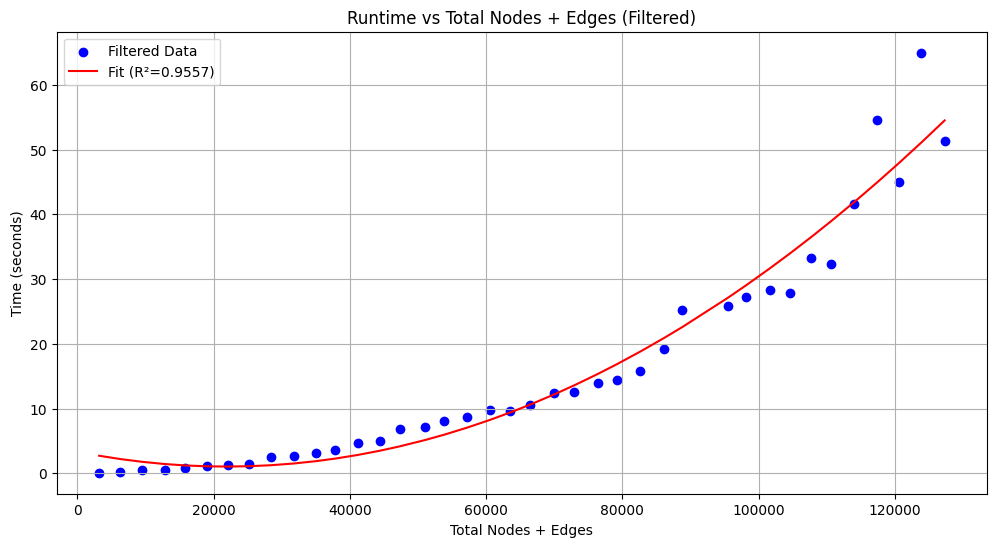

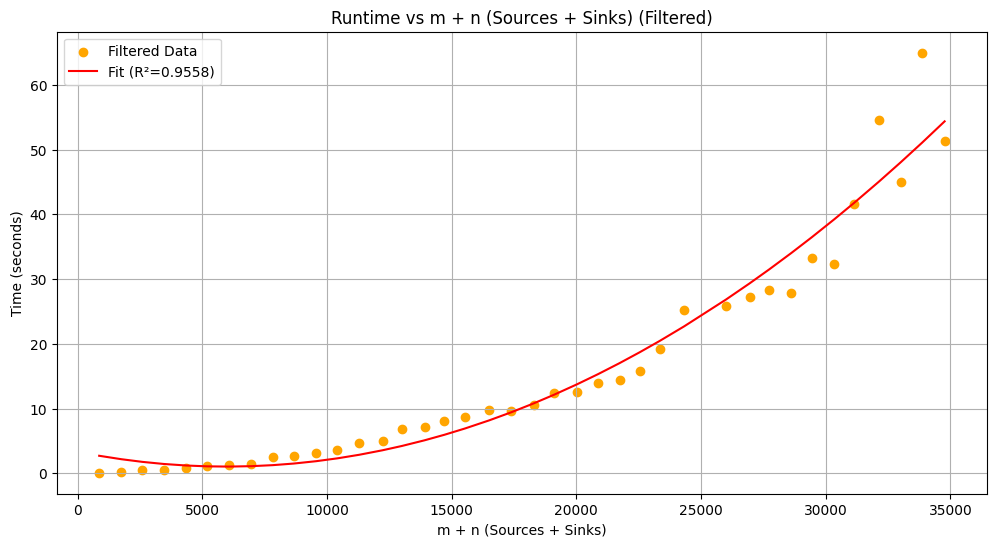

(LinearRegression(), 0.9557868649729131)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# 假设 vertices_and_edges, times, m_plus_n 已生成
vertices_and_edges = np.array(vertices_and_edges).reshape(-1, 1)
m_plus_n = np.array(m_plus_n).reshape(-1, 1)
times = np.array(times)

# 定义函数：过滤异常值并拟合
def filter_and_fit(x, y, title, xlabel, color):
    # 计算 z-score
    mean_y = np.mean(y)
    std_y = np.std(y)
    z_scores = (y - mean_y) / std_y

    # 定义 z-score 阈值，通常使用 3
    threshold = 3
    filtered_indices = np.abs(z_scores) < threshold

    # 过滤后的数据
    x_filtered = x[filtered_indices]
    y_filtered = y[filtered_indices]

    # 多项式拟合
    poly_features = PolynomialFeatures(degree=2)  # 二次多项式
    X_poly = poly_features.fit_transform(x_filtered)
    model = LinearRegression().fit(X_poly, y_filtered)
    y_pred = model.predict(X_poly)
    r2 = r2_score(y_filtered, y_pred)

    # 绘制过滤后的曲线
    plt.figure(figsize=(12, 6))
    plt.scatter(x_filtered, y_filtered, color=color, label='Filtered Data')
    plt.plot(x_filtered, y_pred, color='red', label=f'Fit (R²={r2:.4f})')
    plt.title(f"Runtime vs {xlabel} (Filtered)")
    plt.xlabel(xlabel)
    plt.ylabel("Time (seconds)")
    plt.legend()
    plt.grid(True)
    plt.savefig('2.jpg', format='jpg', dpi=300, bbox_inches='tight') 
    plt.show()

    return model, r2


# 对 "Total Nodes + Edges" vs "Time" 进行过滤和拟合
filter_and_fit(vertices_and_edges, times, 
               title="Runtime vs Total Vertices and Edges (Filtered)",
               xlabel="Total Nodes + Edges", color='blue')

# 对 "m + n" vs "Time" 进行过滤和拟合
filter_and_fit(m_plus_n, times, 
               title="Runtime vs m + n (Filtered)", 
               xlabel="m + n (Sources + Sinks)", color='orange')
